In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import pyplot


In [ ]:
def DU(q):  #Parcial de U respecto de q
    return(30*q)

def metodo_euler(DU, tiempo, q,p, h, iteraciones, masa):  #Derivada de U(q(t))  tiempo, Valores iniciales de q y p, 
    A=np.array([[0,0]])
    for i in range(1,iteraciones):
      newrow=[q,p]
      A = np.vstack([A, newrow])
      tiempo += h
      p = p - h  * DU(q)  
      q = q + h * A[i][1]/masa
    return(A[1:len(A)])

def metodo_euler_simp(DU, tiempo, q,p, h, iteraciones, masa):  #Derivada de U(q(t))  tiempo, Valores iniciales de q y p, 
    A=np.array([[0,0]])
    for i in range(1,iteraciones):
      newrow=[q,p]
      A = np.vstack([A, newrow])
      tiempo += h
      p = p - h  * DU(q)  
      q = q + h * p/masa   # este es el nuevo cambio,  ahora usamos el valor de p más actual.
    return(A[1:len(A)])

def leap_frog(DU, tiempo, q,p, h, iteraciones,masa):  #Derivada de U(q(t))  , Valores iniciales de q y p, 
    A=np.array([[0,0]])
    for i in range(1,iteraciones):
      newrow=np.array([q,p])
      A = np.vstack([A, newrow])
      tiempo += h
      p_m = p - h/2 * DU(q)
      q = q + h * p_m/masa
      p = p_m - h/2 * DU(q)
    return(A[1:len(A)])




###Solucion exacta 

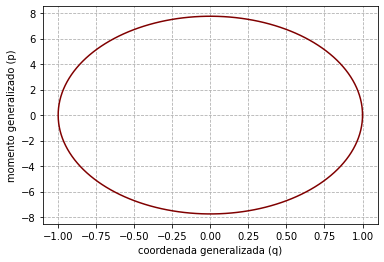

In [ ]:

m=2
k=30
w=np.sqrt(k/m)
t = np.arange(0,2*(np.pi)/w, 0.01)
q1=np.cos(np.sqrt(15) * t)
p1=-2*np.sqrt(15)*np.sin(np.sqrt(15)*t)
plt.plot(q1,p1, color='maroon')
plt.ylabel("momento generalizado (p)")
plt.xlabel('coordenada generalizada (q)')

plt.grid(linestyle='dashed')

plt.show()

###Metodo de Euler

(-17.5, 13.2)

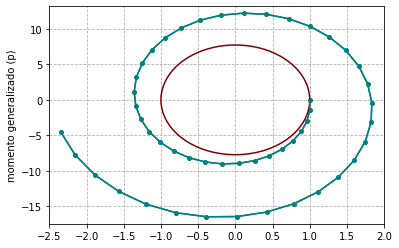

In [ ]:
AS=metodo_euler(DU,0,1,0,0.05,50,2)


plt.grid(linestyle='dashed')
plt.plot(AS[:,0],AS[:,1], color='teal', marker='o', markersize=4)
plt.plot(q1,p1, color="maroon")
plt.plot(AS[:,0],AS[:,1], color='teal')
plt.ylabel("momento generalizado (p)")
plt.xlim([-2.5, 2]) 
plt.ylim([-17.5, 13.2]) 


###Metodo de euler simplectico

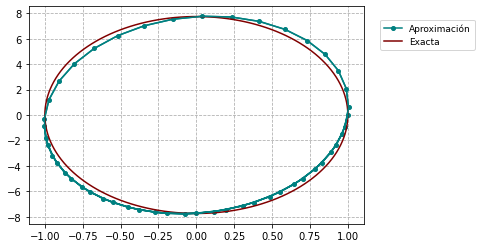

In [ ]:
AS=metodo_euler_simp(DU,0,1,0,0.05,50,2)

plt.grid(linestyle='dashed')
plt.plot(AS[:,0],AS[:,1],  color='teal', marker='o',  markersize=4)
plt.plot(q1,p1, color="maroon")
plt.plot(AS[:,0],AS[:,1],  color='teal')

plt.legend(('Aproximación','Exacta'), bbox_to_anchor=(1.05,0.8), loc=3, borderaxespad=0, prop={'size':9})


###Leapfrog

Text(0.5, 0, 'coordenada generalizada (q)')

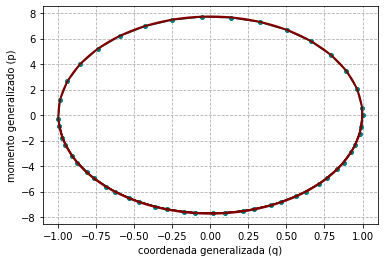

In [ ]:
AS=leap_frog(DU,0,1,0,0.05,50,2)    ##tamaño de paso 0.05
plt.grid(linestyle='dashed')
plt.plot(AS[:,0],AS[:,1],   color='teal', marker='o',  markersize=4)
plt.plot(AS[:,0],AS[:,1], color='maroon')
plt.plot(q1,p1, color="maroon")
plt.ylabel("momento generalizado (p)")
plt.xlabel('coordenada generalizada (q)')


Text(0.5, 0, 'coordenada generalizada (q)')

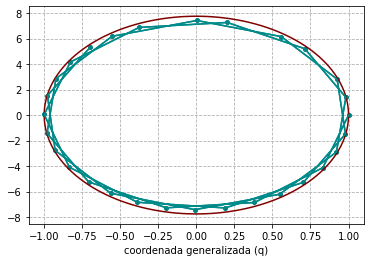

In [ ]:
AS=leap_frog(DU,0,1,0,0.15,30,2)    ##tamaño de paso 0.05
plt.grid(linestyle='dashed')
plt.plot(AS[:,0],AS[:,1],   color='teal', marker='o',  markersize=4)
plt.plot(q1,p1, color="maroon")
plt.plot(AS[:,0],AS[:,1], color='darkcyan')

plt.xlabel('coordenada generalizada (q)')
